# Adversarial samples (3dshapes)

**Author**: Maleakhi A. Wijaya  
**Description**:  
We attack the original 3dshapes dataset using adversarial shifts and visualise the results in this notebook.

In [13]:
# Load utilities functions
%run ../../scripts/3dshapes_utils.py
%run ../../scripts/fgsm_adversarial.py

In [2]:
## Random seed
SEED = 20
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Load dataset and model

This section loads subset of dSprites data and the end-to-end model that we will attack.

In [3]:
files_dir = "../../data/3dshapes.h5"
# index 0 = image category
X_train, X_test, y_train, y_test, c_train, c_test = train_test_split_3dshapes(files_dir, 70000, DatasetTask.Task1, 
                                                                               train_size=0.80, class_index=3)

Training samples: 56000
Testing samples: 14000


In [4]:
n_classes = len(np.unique(np.concatenate([y_train, y_test])))
concept_names = SHAPES3D_CONCEPT_NAMES
concept_values = [len(np.unique(np.concatenate([c_train[:, i], c_test[:, i]]))) for i in range(c_train.shape[1])]

# Split training into validation set as well 
X_train, X_valid = X_train[:40000], X_train[40000:]
y_train, y_valid = y_train[:40000], y_train[40000:]
c_train, c_valid = c_train[:40000], c_train[40000:]

In [10]:
orig_dims = X_train.shape[1:]

In [5]:
# Load model
model_path = "../../models/end_to_end_3dshapes_task1"
end_to_end_model = tf.keras.models.load_model(model_path)

## FGSM

In this section, we fool the model and attack the test dataset using the FGSM adversarial. We store the resulting image in the repository (under data > adversarial_samples).

In [6]:
generate_adversarials(X_test, y_test, end_to_end_model, "3dshapes", False, 
                      epsilon=0.1, n_plots=0, save=True)

100%|██████████| 14000/14000 [01:22<00:00, 169.25it/s]


### Visualisation
We load and visualise the adversarial patterns and the resulting adversarial images.

In [7]:
## Load adversarial images
X_adversarial = np.load("../../data/adversarial_samples/X_adversarial_3dshapes.npy")
perturb = np.load("../../data/adversarial_samples/perturbations_3dshapes.npy")

## Reshape
X_adversarial_orig = X_adversarial.reshape((-1, 64, 64, 3)) # reshape into original dimensions
perturb_orig = perturb.reshape((-1, 64, 64, 3)) # reshape into original dimensions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

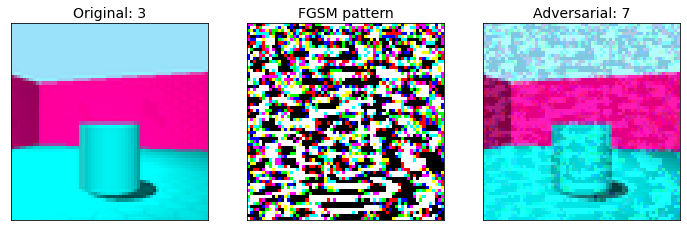

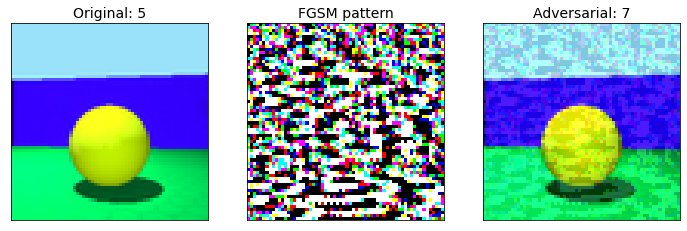

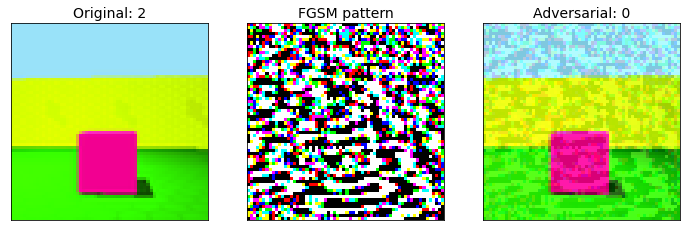

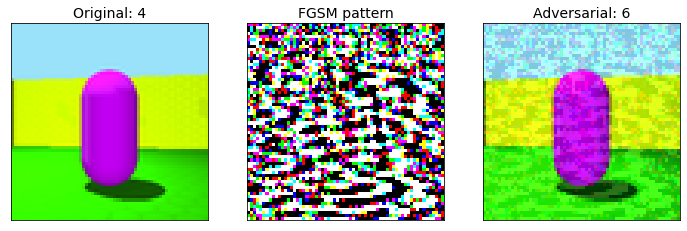

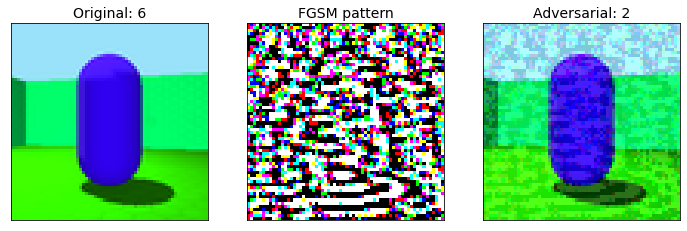

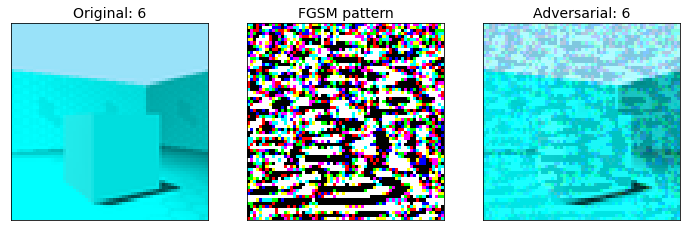

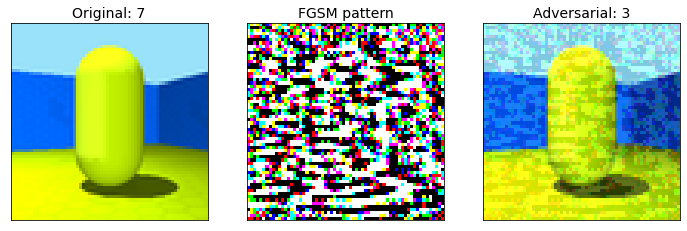

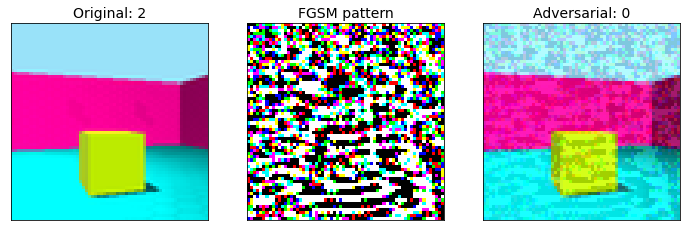

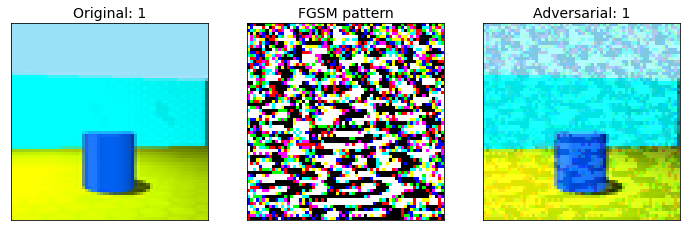

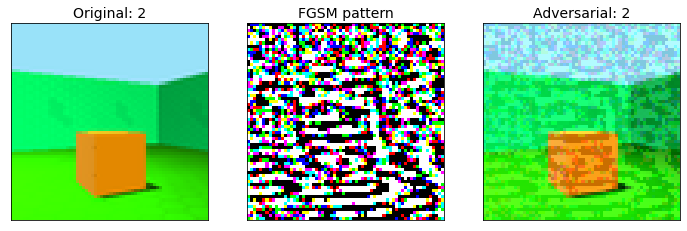

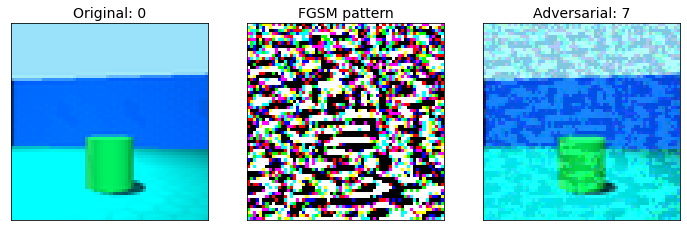

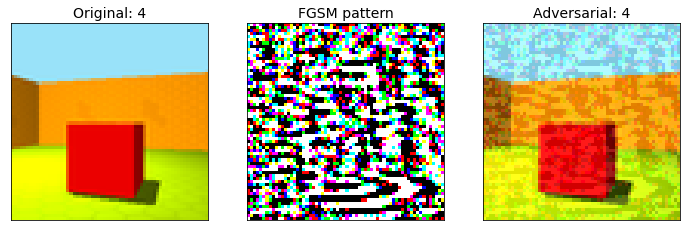

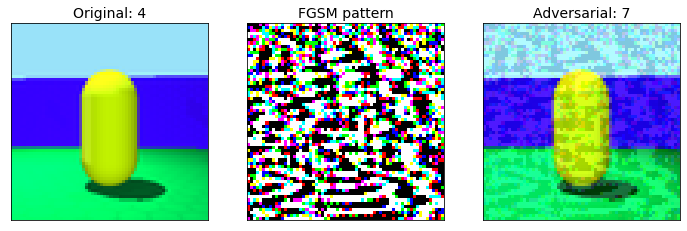

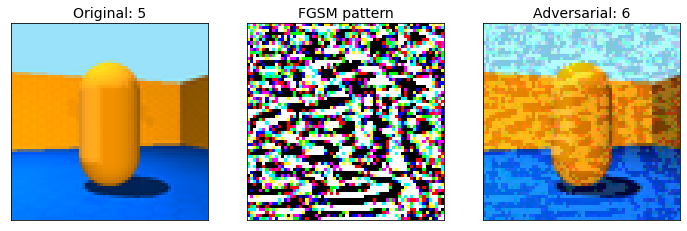

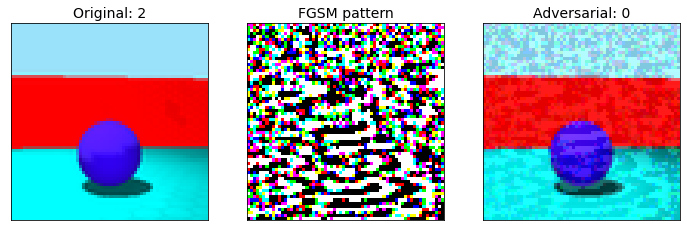

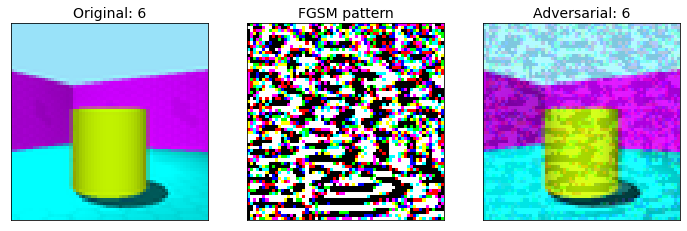

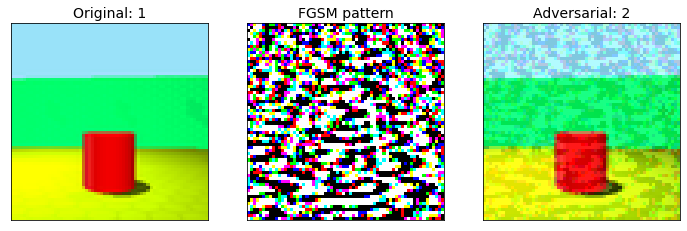

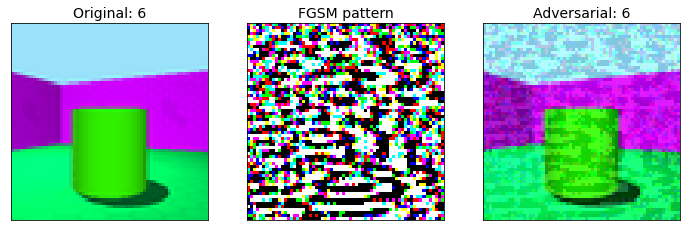

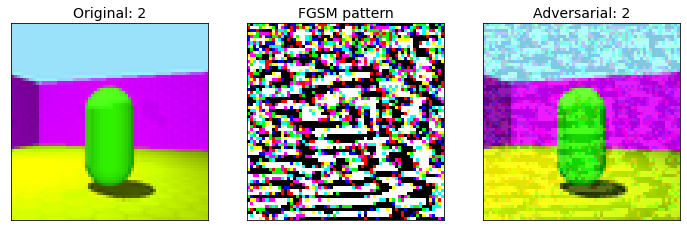

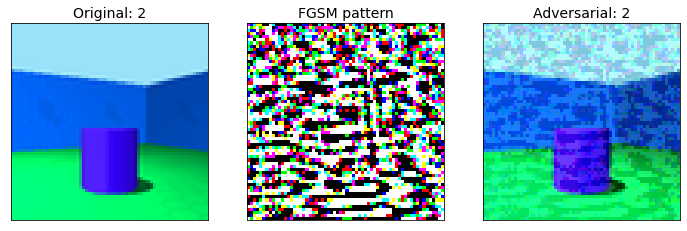

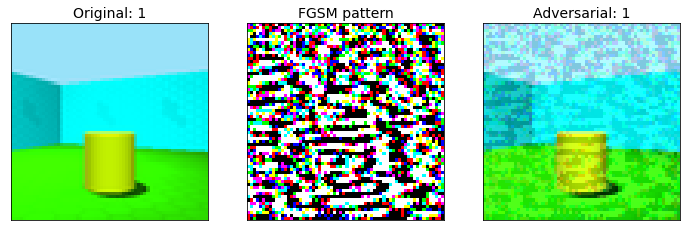

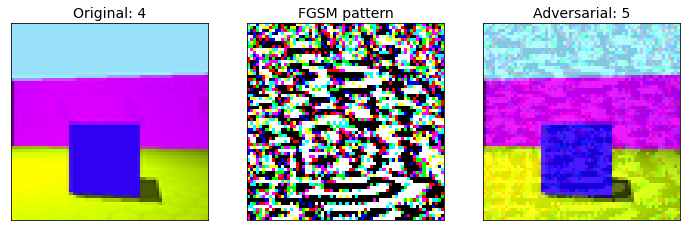

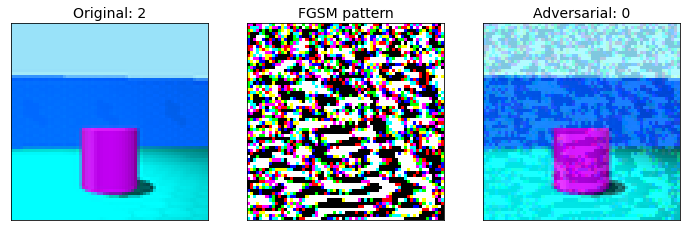

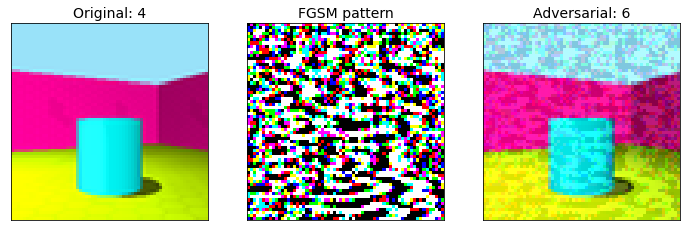

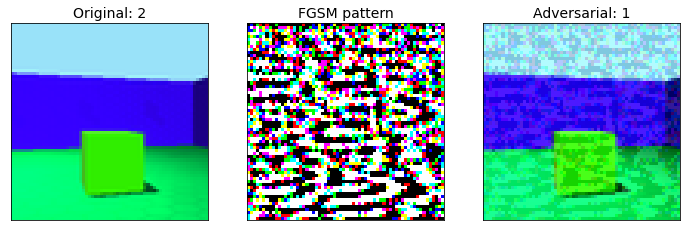

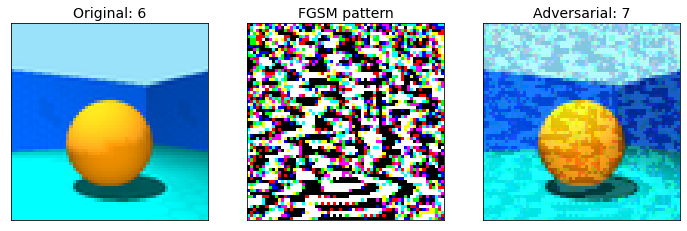

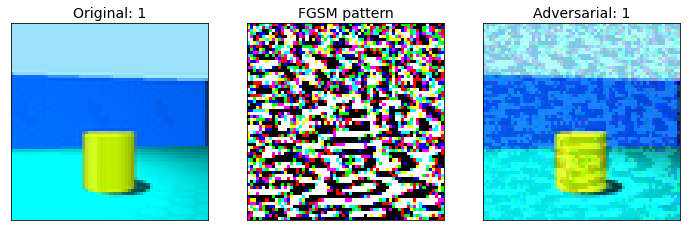

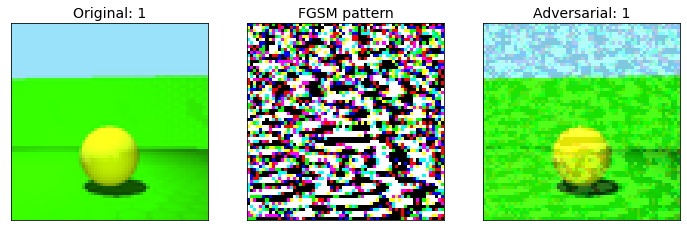

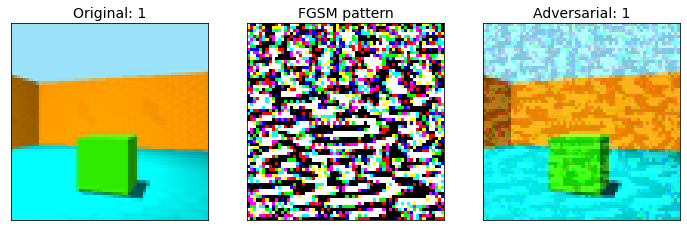

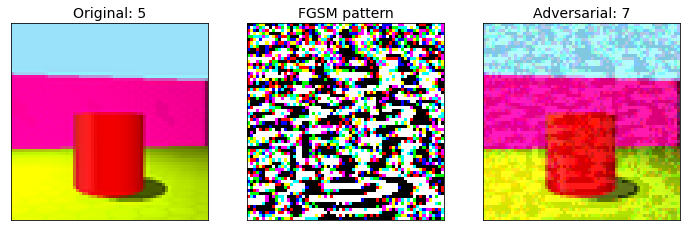

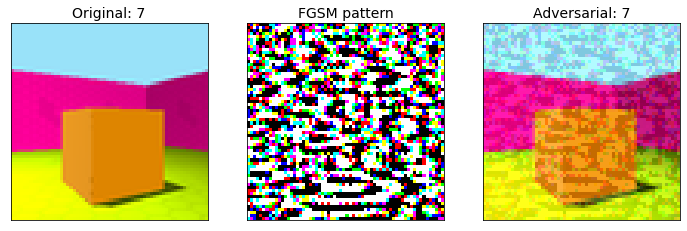

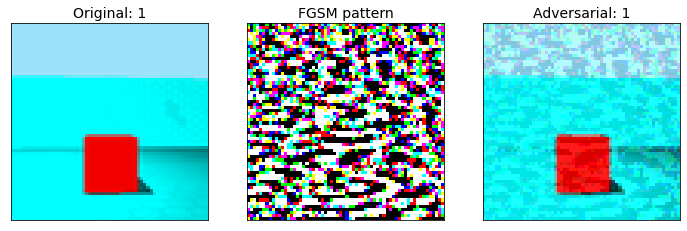

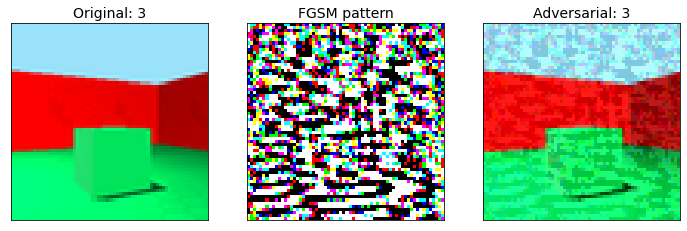

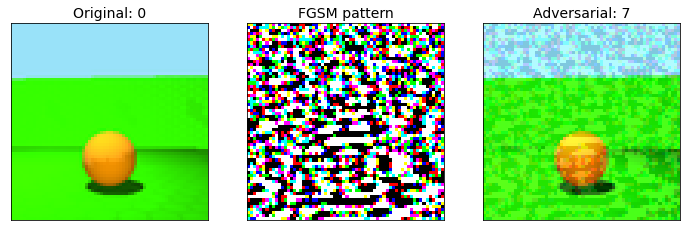

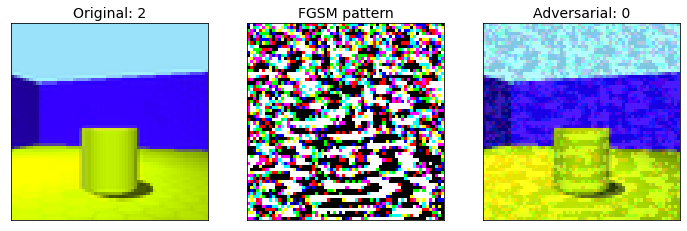

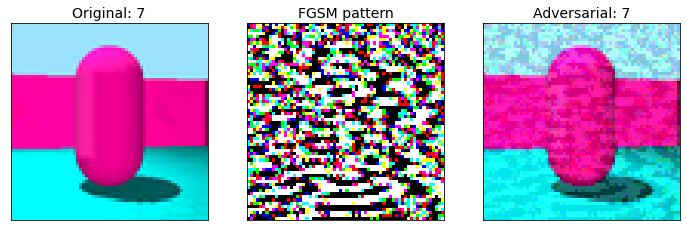

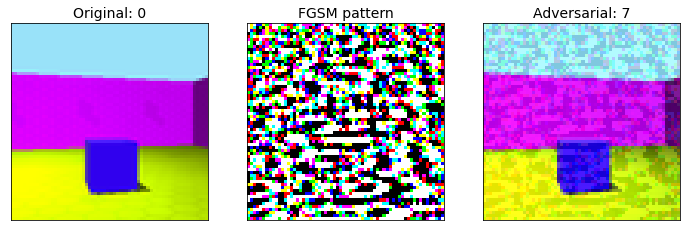

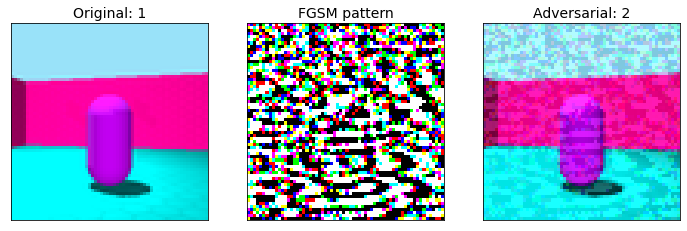

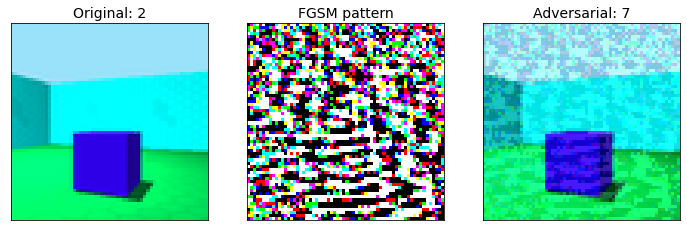

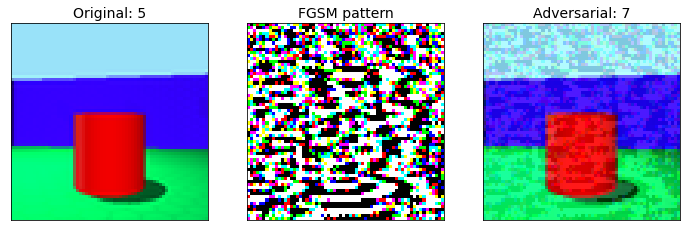

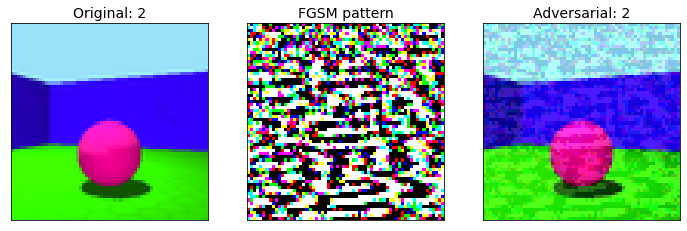

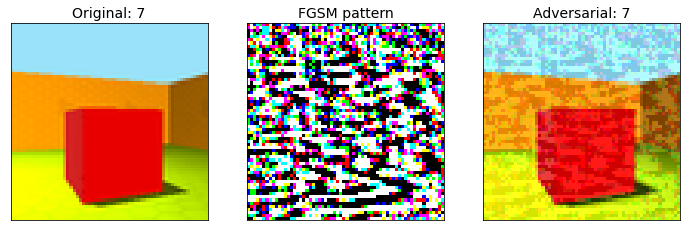

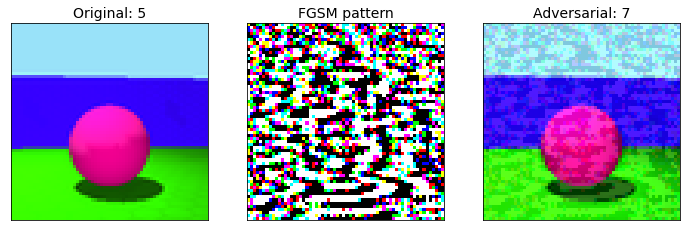

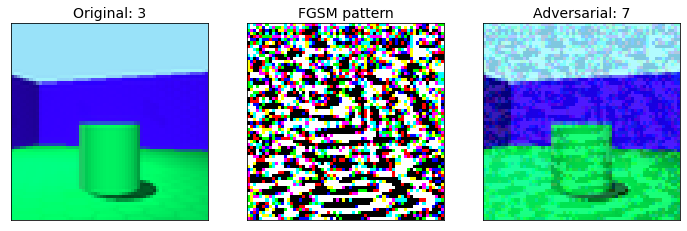

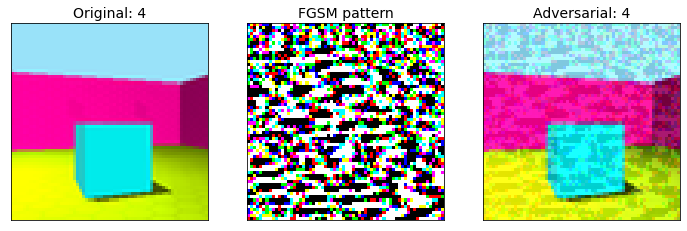

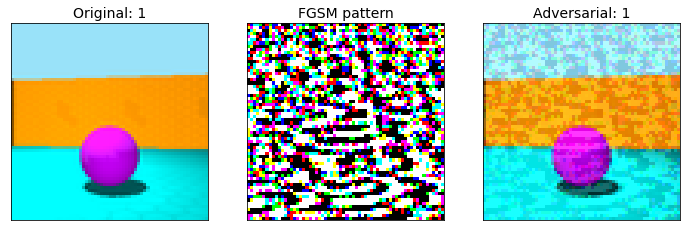

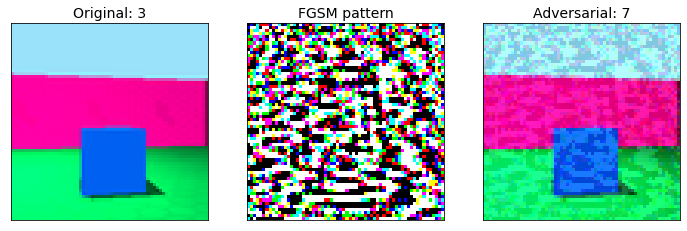

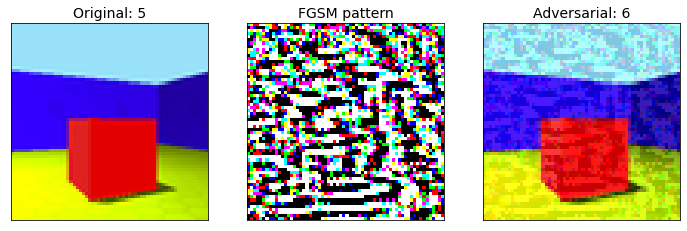

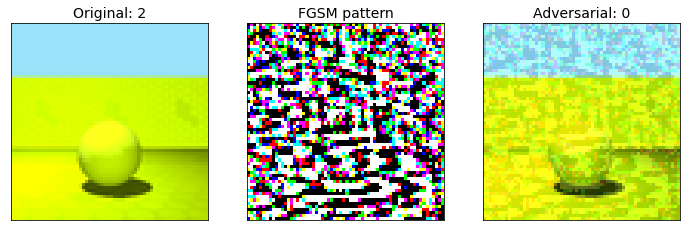

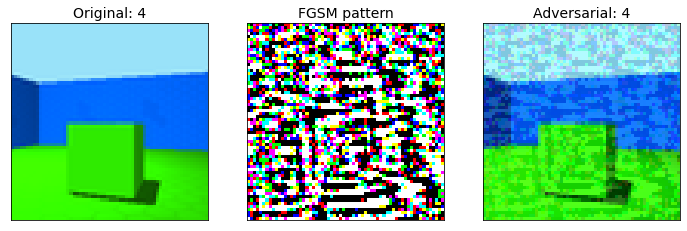

In [25]:
visualise_adversarial(X_test, perturb_orig, X_adversarial_orig, orig_dims,
                      end_to_end_model, np.arange(n_classes), n_plots=50)

### Evaluation 

We calculate the before and after accuracy for the end-to-end and multitask models.

#### End-to-end model

**Before**

In [26]:
# Evaluate model (after)
y_pred = end_to_end_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1688
         1.0       1.00      1.00      1.00      1704
         2.0       1.00      1.00      1.00      1800
         3.0       1.00      1.00      1.00      1774
         4.0       1.00      1.00      1.00      1748
         5.0       1.00      1.00      1.00      1743
         6.0       1.00      1.00      1.00      1762
         7.0       1.00      1.00      1.00      1781

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000



**After**

In [27]:
# Evaluate model (after)
y_pred = end_to_end_model.predict(X_adversarial_orig)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.05      0.05      0.05      1688
         1.0       0.78      0.78      0.78      1704
         2.0       0.49      0.47      0.48      1800
         3.0       0.33      0.13      0.18      1774
         4.0       0.60      0.26      0.36      1748
         5.0       0.47      0.20      0.28      1743
         6.0       0.57      0.45      0.50      1762
         7.0       0.15      0.44      0.22      1781

    accuracy                           0.35     14000
   macro avg       0.43      0.35      0.36     14000
weighted avg       0.43      0.35      0.36     14000



#### Multitask model

In [28]:
path = "../../models/multitask_3dshapes"
mt_model = tf.keras.models.load_model(path)

**Before**

In [29]:
# Evaluate model
for i, pred in enumerate(mt_model.predict(X_test)):
    print("*"*20, f"Model: {DSPRITES_CONCEPT_NAMES[i]}", "*"*20)
    c_truth = c_test[:, i]
    c_pred = np.argmax(pred, axis=1)
    
    print(classification_report(c_truth, c_pred))
    print("\n\n")

******************** Model: color ********************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3149
         1.0       1.00      1.00      1.00      3357
         2.0       1.00      1.00      1.00      3356
         3.0       1.00      1.00      1.00      3308
         4.0       1.00      1.00      1.00       830

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000




******************** Model: shape ********************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1397
         1.0       1.00      1.00      1.00      1671
         2.0       1.00      1.00      1.00      1496
         3.0       1.00      1.00      1.00      1353
         4.0       1.00      1.00      1.00      1363
         5.0       1.00      1.00      1.00      1368
         6.0       

**After**

In [30]:
# Evaluate model
for i, pred in enumerate(mt_model.predict(X_adversarial_orig)):
    print("*"*20, f"Model: {DSPRITES_CONCEPT_NAMES[i]}", "*"*20)
    c_truth = c_test[:, i]
    c_pred = np.argmax(pred, axis=1)
    
    print(classification_report(c_truth, c_pred))
    print("\n\n")

******************** Model: color ********************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3149
         1.0       1.00      0.99      1.00      3357
         2.0       1.00      0.99      0.99      3356
         3.0       0.96      1.00      0.98      3308
         4.0       1.00      0.91      0.95       830

    accuracy                           0.99     14000
   macro avg       0.99      0.98      0.98     14000
weighted avg       0.99      0.99      0.99     14000




******************** Model: shape ********************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1397
         1.0       1.00      0.91      0.95      1671
         2.0       0.93      0.99      0.96      1496
         3.0       0.99      1.00      0.99      1353
         4.0       1.00      0.99      0.99      1363
         5.0       0.94      1.00      0.97      1368
         6.0       